<a href="https://colab.research.google.com/github/mehrnazeraeisi/Diabetes/blob/main/Diabetes_Regression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split


In [35]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        r2 = knn_reg.score(X_feature, y)
        features_scores.append((feature, r2))

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score']).sort_values(by='R2_Score', ascending=False)
    return df_scores


In [36]:
# Function to compute KNN classification accuracy for feature group
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

In [37]:
# مثال برای بارگذاری دیتاست Breast Cancer
data = load_diabetes()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names

In [38]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Cancer dataset):
  Feature  R2_Score
2     bmi  0.478340
8      s5  0.443763
3      bp  0.268229
5      s2  0.227701
4      s1  0.200878
9      s6  0.181208
6      s3  0.171093
7      s4  0.128051
0     age  0.017238
1     sex -0.080665


In [39]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.8]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.7) & (data_scores['R2_Score'] <= 0.8)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.6) & (data_scores['R2_Score'] <= 0.7)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.5) & (data_scores['R2_Score'] <= 0.6)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.4) & (data_scores['R2_Score'] <= 0.5)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.3) & (data_scores['R2_Score'] <= 0.4)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > 0.2) & (data_scores['R2_Score'] <= 0.3)]['Feature'].tolist()
poor_features = data_scores[data_scores['R2_Score'] <= 0.2]['Feature'].tolist()


In [40]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [41]:

# Compute R² scores for groups
r2_all = knn_score(X_data, y_data, data_features)
r2_strong = knn_score(X_data, y_data, strong_features)
r2_medium_1 = knn_score(X_data, y_data, medium_features_1)
r2_medium_2 = knn_score(X_data, y_data, medium_features_2)
r2_medium_3 = knn_score(X_data, y_data, medium_features_3)
r2_medium_4 = knn_score(X_data, y_data, medium_features_4)
r2_medium_5 = knn_score(X_data, y_data, medium_features_5)
r2_medium_6 = knn_score(X_data, y_data, medium_features_6)
r2_poor = knn_score(X_data, y_data, poor_features)



In [42]:
# Heatmap visualization with R² in titles
def id_matrix(X_data, y_data, features, scores_dict):
    n_plots = len(features)
    n_rows = (n_plots + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        values = X_data[feature].values.reshape(-1, 1)
        dist_mat = np.abs(values - values.T)
        sorted_indices = np.argsort(dist_mat, axis=1)
        nearest_labels = y_data[sorted_indices]

        sns.heatmap(nearest_labels, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
        r2_val = scores_dict.get(feature, None)
        title = f'{feature}\nR² = {r2_val:.2f}' if r2_val is not None else feature
        axes[i].set_title(title)
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Samples')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [43]:
# Create dictionary for R² lookups
r2_dict = dict(zip(data_scores['Feature'], data_scores['R2_Score']))

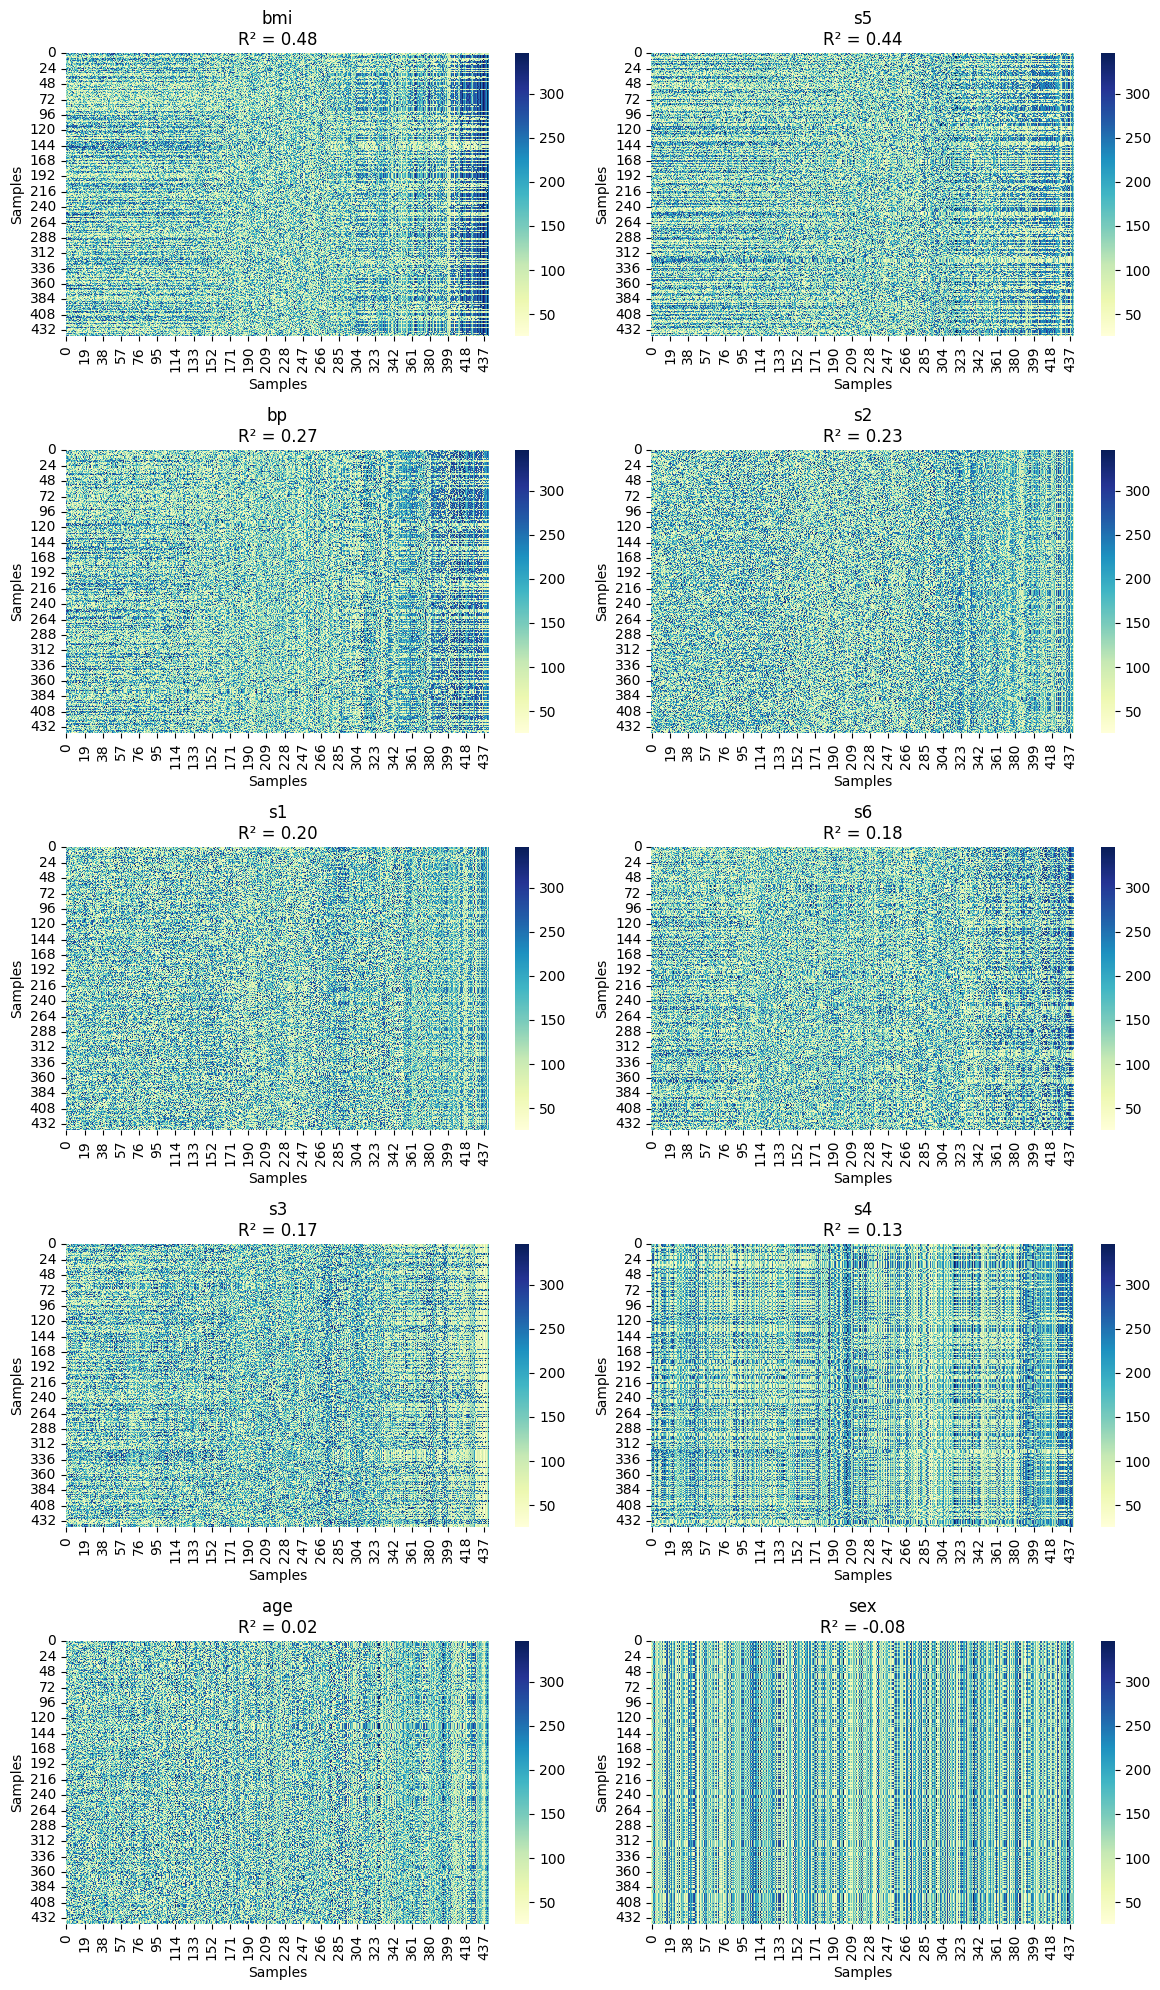

In [44]:
# Plot sorted heatmaps
id_matrix(X_data, y_data, data_scores['Feature'].tolist(), r2_dict)

In [45]:
def plot_feature_vs_target_indexed_grid(X, y, df_scores):
    features_sorted = df_scores['Feature'].tolist()
    n_features = len(features_sorted)
    n_rows = (n_features + 1) // 2

    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    n_samples = len(X)

    for i, feature in enumerate(features_sorted):
        values = X[feature].values
        indices = np.argsort(values)
        x_axis = np.arange(n_samples)  # Sequential indices
        y_axis = y[indices]

        ax = axes[i]
        ax.scatter(x_axis, y_axis, c=y_axis, cmap='Set1', edgecolor='k', s=50)
        ax.set_title(f"{feature} (R² = {df_scores.loc[df_scores['Feature'] == feature, 'R2_Score'].values[0]:.2f})")
        ax.set_xlabel("Sorted Sample Index")
        ax.set_ylabel("Target")

        # Add vertical gridlines for each point
        ax.set_xticks(np.arange(0, n_samples, 1))
        ax.grid(True, axis='x', linestyle='--', linewidth=0.4, alpha=0.7)

        # Optional: Reduce number of xtick labels to avoid clutter
        if n_samples > 40:
            ax.set_xticks(np.arange(0, n_samples, 10))
            ax.set_xticklabels(np.arange(0, n_samples, 10))

    # Remove unused subplots if number of features is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

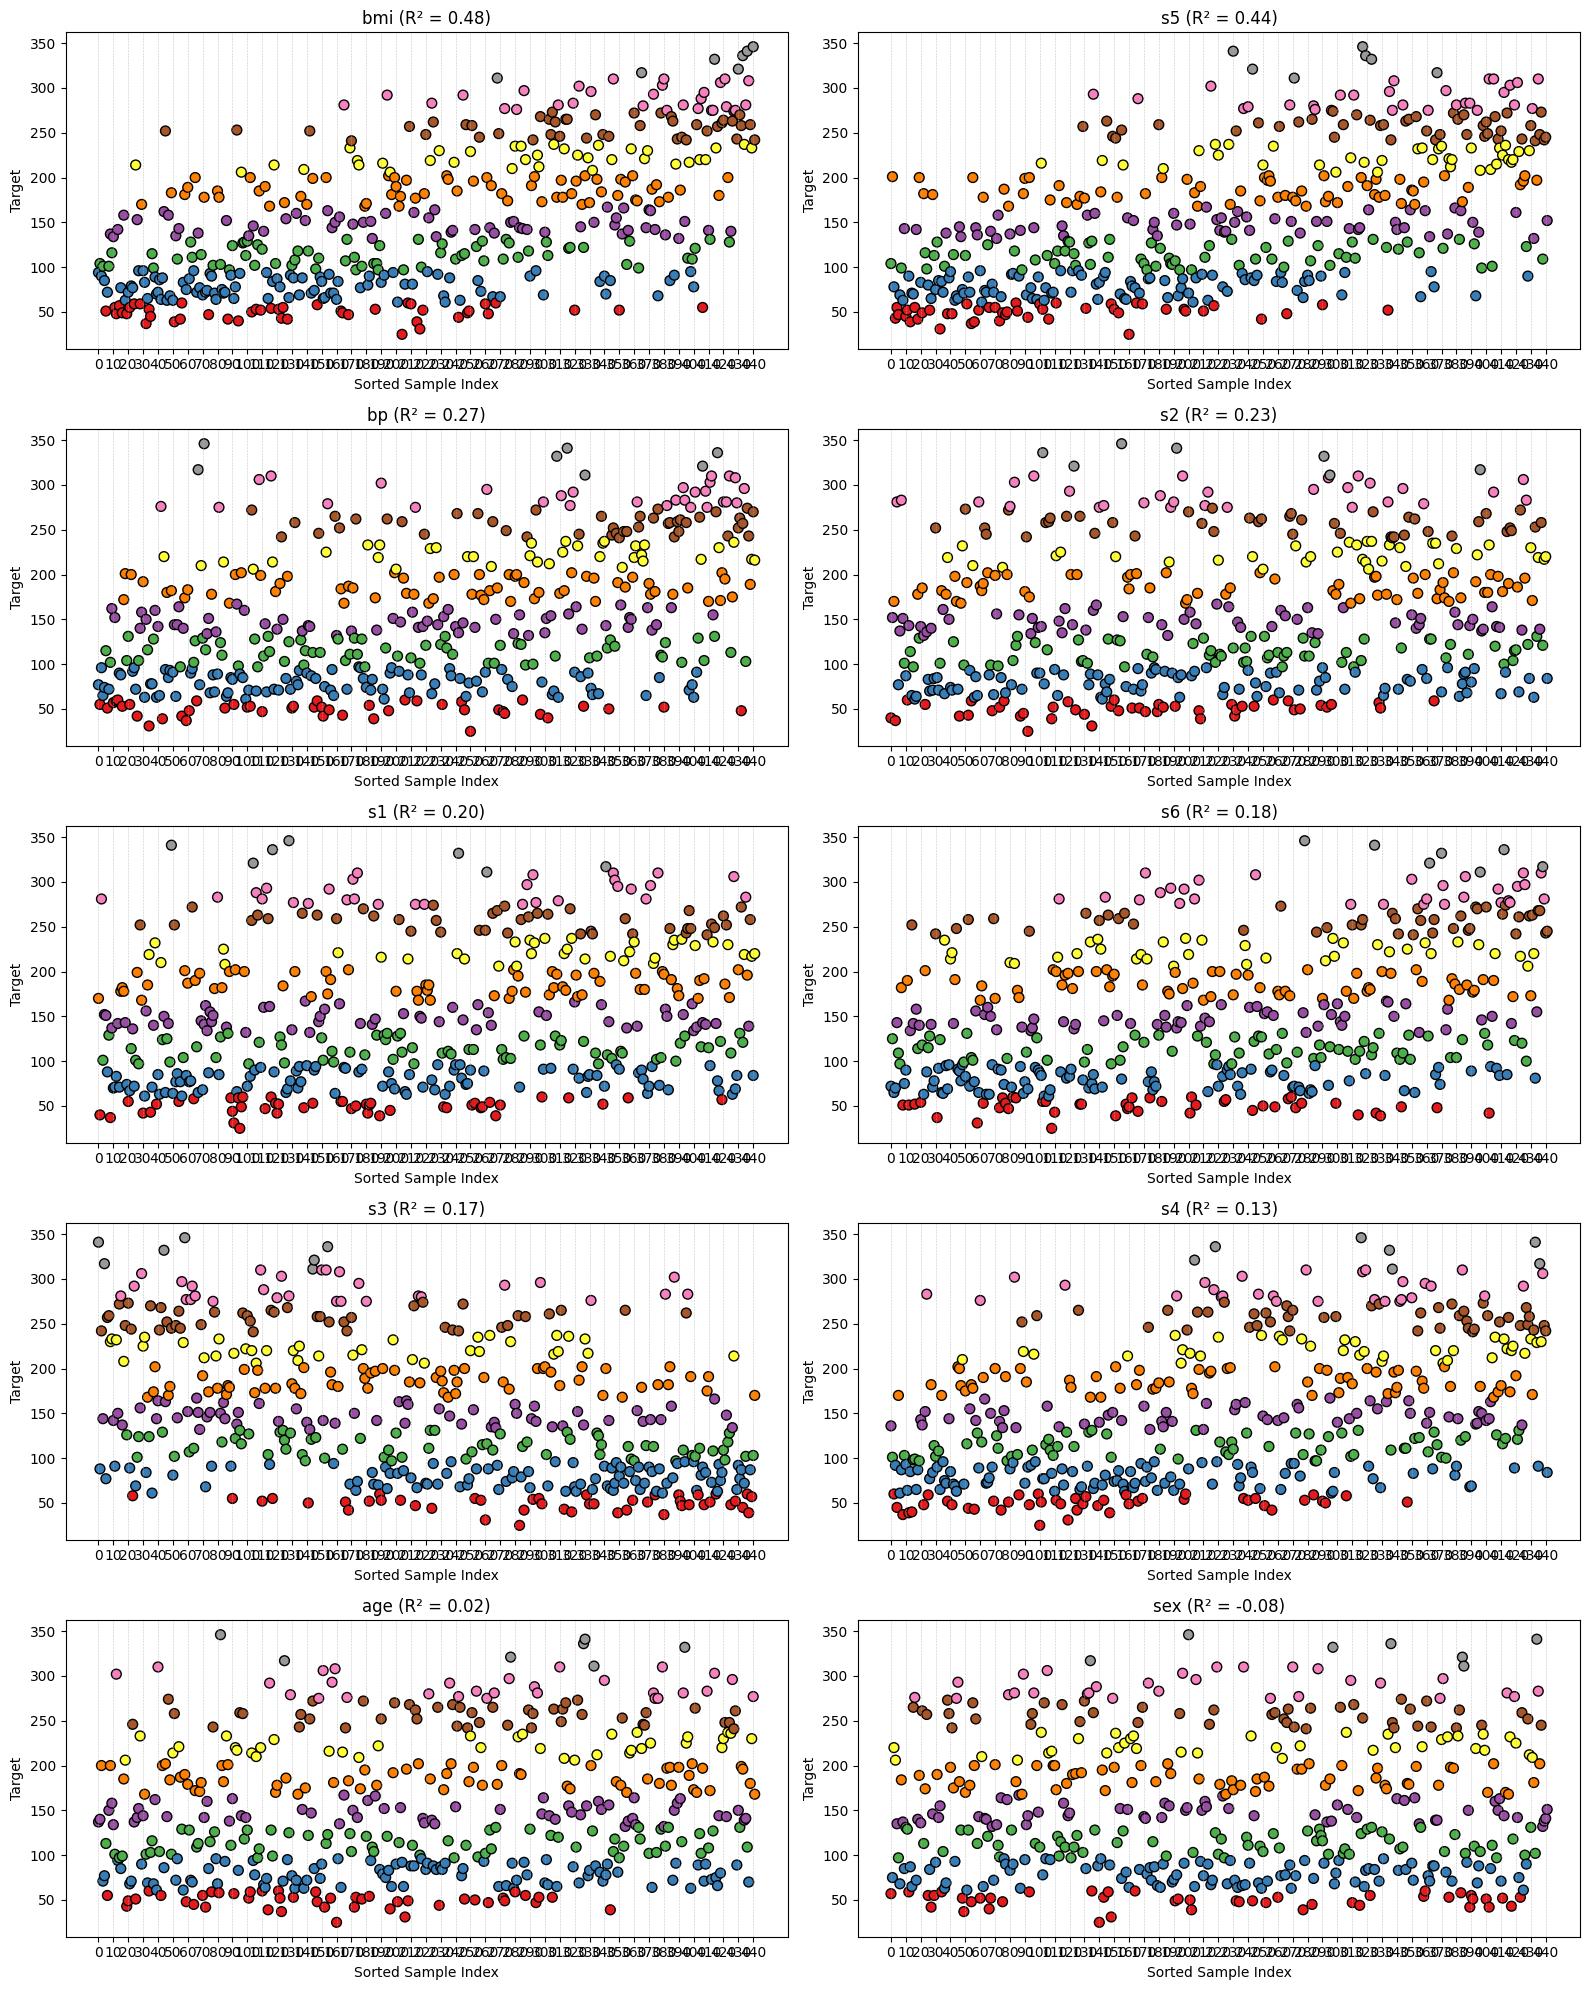

In [46]:
# Call the updated function
plot_feature_vs_target_indexed_grid(X_data, y_data, data_scores)

In [15]:

# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6, poor_features]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

In [16]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features (0.7-0.8)', 'Medium Features (0.6-0.7)',
                      'Medium Features (0.5-0.6)', 'Medium Features (0.4-0.5)', 'Medium Features (0.3-0.4)',
                      'Medium Features (0.2-0.3)', 'Poor Features'],
    'R2_Score': r2_scores,
    'Accuracy': acc_scores
})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and Accuracy):
               Feature_Group  R2_Score  Accuracy
0               All Features  0.604958  0.183258
1            Strong Features       NaN       NaN
2  Medium Features (0.7-0.8)       NaN       NaN
3  Medium Features (0.6-0.7)       NaN       NaN
4  Medium Features (0.5-0.6)       NaN       NaN
5  Medium Features (0.4-0.5)  0.595963  0.203620
6  Medium Features (0.3-0.4)       NaN       NaN
7  Medium Features (0.2-0.3)  0.353531  0.219457
8              Poor Features  0.437460  0.174208


In [17]:
# Initialize dictionaries
tv_data = {}      # Total number of label blocks per feature
r2_data  = {}
accu_data  = {}
label_blocks = {}  # Store label-wise block counts

In [18]:
# Initialize models
k_opt = 5
knn_reg = KNeighborsRegressor(n_neighbors=k_opt)
knn_cls = KNeighborsClassifier(n_neighbors=k_opt)

In [19]:
for feature in data_features:
    X_feature = X_data[[feature]]

    # Fit KNN Regressor
    knn_reg.fit(X_feature, y_data)
    r2 = knn_reg.score(X_feature, y_data)
    r2_data[feature] = r2

    # Fit KNN Classifier and calculate accuracy
    knn_cls.fit(X_feature, y_data)
    predictions = knn_cls.predict(X_feature)
    accuracy = accuracy_score(y_data, predictions)
    accu_data[feature] = accuracy

    # Compute label "non-adjustments" (block count) after sorting
    sorted_index = np.argsort(X_feature.values.ravel())
    sorted_labels = y_data[sorted_index]

    block_counts = {}
    for label in np.unique(y_data):
        label_mask = (sorted_labels == label).astype(int)
        transitions = np.diff(np.pad(label_mask, (1, 0))) == 1
        block_count = np.sum(transitions)
        block_counts[label] = block_count

    tv_data[feature] = sum(block_counts.values())  # Total blocks
    label_blocks[feature] = block_counts           # Save detailed label-wise

In [20]:
# Print results sorted by total non-adjustments
print(f"There are {len(y_data)} datapoints. Operations based on k_opt={k_opt}")
print(f"{'Feature':30s} | {'TV (Blocks)':^12} | {'R²':^8} | {'Accuracy':^8} | Label Blocks")
print("-" * 90)

for f in sorted(tv_data, key=tv_data.get):
    blocks = label_blocks[f]
    block_str = " | ".join(f"L{l}:{blocks[l]}" for l in sorted(blocks))
    print(f"{f:30s} | {tv_data[f]:^12d} | {r2_data[f]:8.2f} | {accu_data[f]:8.2f} | {block_str}")

There are 442 datapoints. Operations based on k_opt=5
Feature                        | TV (Blocks)  |    R²    | Accuracy | Label Blocks
------------------------------------------------------------------------------------------
sex                            |     439      |    -0.08 |     0.00 | L25.0:1 | L31.0:1 | L37.0:1 | L39.0:2 | L40.0:1 | L42.0:3 | L43.0:1 | L44.0:1 | L45.0:1 | L47.0:2 | L48.0:3 | L49.0:3 | L50.0:1 | L51.0:3 | L52.0:4 | L53.0:4 | L54.0:1 | L55.0:4 | L57.0:1 | L58.0:1 | L59.0:4 | L60.0:3 | L61.0:2 | L63.0:4 | L64.0:3 | L65.0:4 | L66.0:2 | L67.0:2 | L68.0:3 | L69.0:3 | L70.0:2 | L71.0:5 | L72.0:6 | L73.0:1 | L74.0:2 | L75.0:2 | L77.0:4 | L78.0:3 | L79.0:1 | L80.0:1 | L81.0:2 | L83.0:3 | L84.0:4 | L85.0:4 | L86.0:1 | L87.0:2 | L88.0:3 | L89.0:2 | L90.0:5 | L91.0:4 | L92.0:2 | L93.0:2 | L94.0:3 | L95.0:2 | L96.0:4 | L97.0:4 | L98.0:1 | L99.0:2 | L100.0:1 | L101.0:3 | L102.0:3 | L103.0:2 | L104.0:4 | L107.0:2 | L108.0:1 | L109.0:4 | L110.0:2 | L111.0:3 | L113.0:3 | L

In [21]:
#### نتیجه گیری روی این دیتاست

#مقاسه ی روش کی ان ان رگرسیون به دو روش، یکی روی همه ی ویژگیها و یکی بعد از حذف ویژگی یا ویژگی های بد

# تقسیم داده به آموزش و آزمون (80% آموزش، 20% آزمون)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# حالت ۱: استفاده از تمام ۴ ویژگی
knn_full = KNeighborsRegressor()
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)

# محاسبه R² و Accuracy برای حالت ۱
r2_full = r2_score(y_test, y_pred_full)
acc_full = accuracy_score(y_test, np.round(y_pred_full))  # تبدیل پیش‌بینی‌های رگرسیون به کلاس


# محاسبه R² Score برای هر ویژگی
def calculate_r2_scores(X, y):
    r2_scores = {}
    knn = KNeighborsRegressor()

    for feature in X.columns:
        knn.fit(X[[feature]], y)
        r2_scores[feature] = knn.score(X[[feature]], y)

    return r2_scores

# محاسبه امتیازات
r2_scores = calculate_r2_scores(X_data, y_data)
print("R² Scores برای هر ویژگی:")
print(r2_scores)

# شناسایی ویژگی‌های با R² کمتر از ۰.۴
features_to_drop = [feature for feature, score in r2_scores.items() if score < 0.4]
print("\nویژگی‌های حذف شده (R² < 0.4):", features_to_drop)

# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# حذف ویژگی‌های کم اهمیت
X_train_reduced = X_train.drop(features_to_drop, axis=1)
X_test_reduced = X_test.drop(features_to_drop, axis=1)

print("\nویژگی‌های باقیمانده:", list(X_train_reduced.columns))

knn_reduced = KNeighborsRegressor()
knn_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = knn_reduced.predict(X_test_reduced)

# محاسبه R² و Accuracy برای حالت ۲
r2_reduced = r2_score(y_test, y_pred_reduced)
acc_reduced = accuracy_score(y_test, np.round(y_pred_reduced))

# نمایش نتایج
print("\nنتایج ارزیابی KNN Regression:")
print("--------------------------------")
print(f"۱. با همه ی ویژگی ها:")
print(f"   - R² Score: {r2_full:.4f}")
print(f"   - Accuracy: {acc_full:.4f}")

print("\n۲. نتایج ارزیابی بعد از کاهش ویژگی ها:")
print(f"   - R² Score: {r2_reduced:.4f}")
print(f"   - Accuracy: {acc_reduced:.4f}")

# مقایسه نتایج
if r2_full > r2_reduced:
    print("\nنتیجه: مدل با همه ی ویژگی ها عملکرد بهتری دارد.")
elif r2_full < r2_reduced:
    print("\nنتیجه: مدل با روش کاهش ویژگی ها عملکرد بهتری دارد.")
else:
    print("\nنتیجه: هر دو مدل عملکرد یکسانی دارند.")

R² Scores برای هر ویژگی:
{'age': 0.017237911922240556, 'sex': -0.0806648834582886, 'bmi': 0.47834046541327624, 'bp': 0.2682294532591918, 's1': 0.20087750154170403, 's2': 0.22770147530988838, 's3': 0.17109280553579176, 's4': 0.1280506051297382, 's5': 0.4437634625500919, 's6': 0.18120826822260028}

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های باقیمانده: ['bmi', 's5']

نتایج ارزیابی KNN Regression:
--------------------------------
۱. با همه ی ویژگی ها:
   - R² Score: 0.3238
   - Accuracy: 0.0112

۲. نتایج ارزیابی بعد از کاهش ویژگی ها:
   - R² Score: 0.4979
   - Accuracy: 0.0000

نتیجه: مدل با روش کاهش ویژگی ها عملکرد بهتری دارد.


تعداد تکرارها را وارد کنید: 50
درصد داده آزمون را وارد کنید (مثلاً 0.2 برای 20%): 0.13

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های حذف شده (R² < 0.4): ['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's6']

ویژگی‌های 

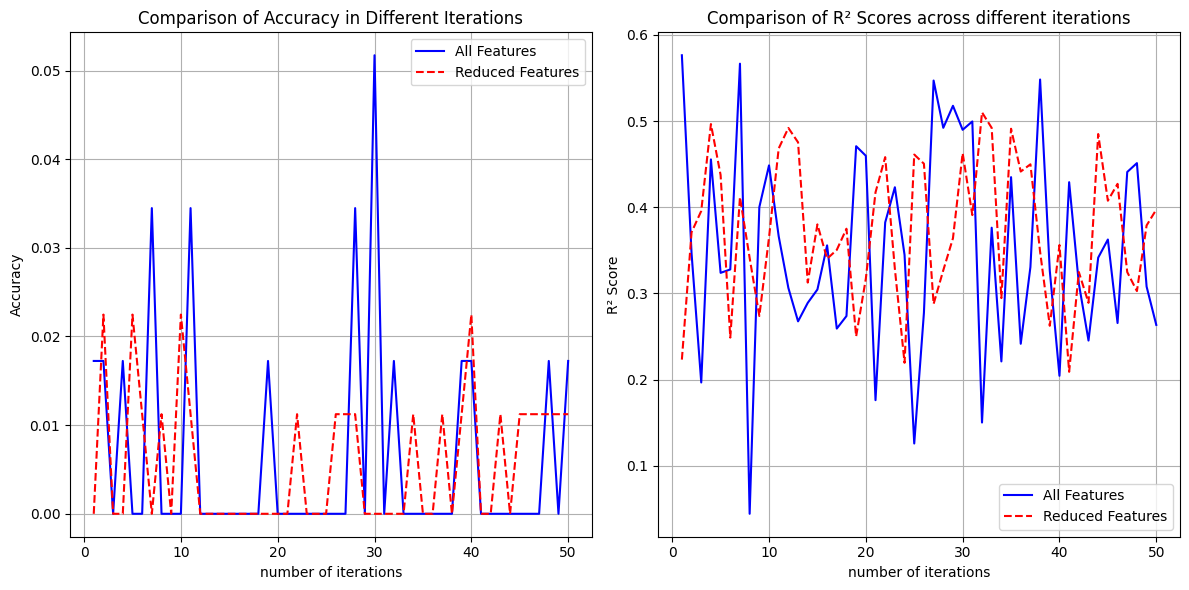


نتیجه‌گیری نهایی: مدل با روش کاهش ویژگی ها عملکرد بهتری دارد.


In [22]:
# دریافت ورودی از کاربر
n_iterations = int(input("تعداد تکرارها را وارد کنید: "))
test_size = float(input("درصد داده آزمون را وارد کنید (مثلاً 0.2 برای 20%): "))

# آرایه‌های برای ذخیره نتایج
r2_full_list, r2_reduced_list = [], []
acc_full_list, acc_reduced_list = [], []
iterations = range(1, n_iterations+1)

# حلقه تکرار
for i in iterations:
    # تقسیم داده
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

    # حالت 1: با تمام ویژگی‌ها
    knn_full = KNeighborsRegressor()
    knn_full.fit(X_train, y_train)
    y_pred_full = knn_full.predict(X_test)
    r2_full_list.append(r2_score(y_test, y_pred_full))
    acc_full_list.append(accuracy_score(y_test, np.round(y_pred_full)))

    # حالت 2: روش کاهش ویژگی های بد
    # شناسایی ویژگی‌های با R² کمتر از ۰.۴
    features_to_drop = [feature for feature, score in r2_scores.items() if score < 0.4]
    print("\nویژگی‌های حذف شده (R² < 0.4):", features_to_drop)

    # تقسیم داده به آموزش و آزمون
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

    # حذف ویژگی‌های کم اهمیت
    X_train_reduced = X_train.drop(features_to_drop, axis=1)
    X_test_reduced = X_test.drop(features_to_drop, axis=1)
    knn_reduced = KNeighborsRegressor()
    knn_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = knn_reduced.predict(X_test_reduced)
    r2_reduced_list.append(r2_score(y_test, y_pred_reduced))
    acc_reduced_list.append(accuracy_score(y_test, np.round(y_pred_reduced)))

# محاسبه میانگین نتایج
avg_r2_full = np.mean(r2_full_list)
avg_r2_reduced = np.mean(r2_reduced_list)
avg_acc_full = np.mean(acc_full_list)
avg_acc_reduced = np.mean(acc_reduced_list)

# نمایش نتایج میانگین
print("\nمیانگین نتایج پس از تکرار:")
print("--------------------------------")
print(f"مدل با همه ی ویژگی ها - میانگین R²: {avg_r2_full:.4f}, میانگین Accuracy: {avg_acc_full:.4f}")
print(f"مدل با روش کاهش ویژگی ها - میانگین R²: {avg_r2_reduced:.4f}, میانگین Accuracy: {avg_acc_reduced:.4f}")

# رسم نمودارها
plt.figure(figsize=(12, 6))

# ساب‌پلات اول: Accuracy
plt.subplot(1, 2, 1)
plt.plot(iterations, acc_full_list, 'b-', label='All Features')
plt.plot(iterations, acc_reduced_list, 'r--', label='Reduced Features')
plt.xlabel('number of iterations')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy in Different Iterations')
plt.legend()
plt.grid(True)

# ساب‌پلات دوم: R² Score
plt.subplot(1, 2, 2)
plt.plot(iterations, r2_full_list, 'b-', label='All Features')
plt.plot(iterations, r2_reduced_list, 'r--', label='Reduced Features')
plt.xlabel('number of iterations')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores across different iterations')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# نتیجه‌گیری نهایی
if avg_r2_full > avg_r2_reduced:
    print("\nنتیجه‌گیری نهایی: مدل با همه ی ویژگی ها عملکرد بهتری دارد.")
elif avg_r2_full < avg_r2_reduced:
    print("\nنتیجه‌گیری نهایی: مدل با روش کاهش ویژگی ها عملکرد بهتری دارد.")
else:
    print("\nنتیجه‌گیری نهایی: هر دو مدل عملکرد یکسانی دارند.")